# **Group Assignment** - Bike Sharing

- `instant`: record index
- `dteday` : date
- `season` : season (1:springer, 2:summer, 3:fall, 4:winter)
- `yr` : year (0: 2011, 1:2012)
- `mnth` : month ( 1 to 12)
- `hr` : hour (0 to 23)
- `holiday` : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
+ `weathersit` : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : Normalized temperature in Celsius. The values are divided to 41 (max)
- `atemp`: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- `hum`: Normalized humidity. The values are divided to 100 (max)
- `windspeed`: Normalized wind speed. The values are divided to 67 (max)
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered

## PART I: Exploratory Data Analysis

## PART II: Prediction Model

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
import joblib
import matplotlib.pyplot as plt

In [46]:
data = pd.read_csv("bike-sharing_hourly.csv")

In [44]:
weather = data.groupby(["yr","mnth","day","hr"]).agg({
        'cnt':'mean',
        'weathersit': 'mean'
        })

weather.groupby(["yr","mnth","day","hr"])["cnt"].sum()

yr  mnth  day  hr
0   1     01   0      16.0
               1      40.0
               2      32.0
               3      13.0
               4       1.0
                     ...  
1   12    31   19    119.0
               20     89.0
               21     90.0
               22     61.0
               23     49.0
Name: cnt, Length: 17379, dtype: float64

In [85]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [47]:
data['day'] = data['dteday'].apply(lambda x: str(x)[-2:])

In [49]:
data = data.drop(["dteday","casual","registered","instant","yr","temp"],axis=1)

In [50]:
data.to_csv('cleaned_data.csv', index=False)

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   mnth        17379 non-null  int64  
 2   hr          17379 non-null  int64  
 3   holiday     17379 non-null  int64  
 4   weekday     17379 non-null  int64  
 5   workingday  17379 non-null  int64  
 6   weathersit  17379 non-null  int64  
 7   temp        17379 non-null  float64
 8   atemp       17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  cnt         17379 non-null  int64  
 12  day         17379 non-null  object 
dtypes: float64(4), int64(8), object(1)
memory usage: 1.7+ MB


In [51]:
# Split data into features and target
X = data.drop(["cnt"], axis=1).values 
y = data["cnt"].values

In [52]:
# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [127]:
# Comment on why chose Random Forest Regressor

In [53]:
# Instatiate and fit random forest regressor
random_forest = RandomForestRegressor(random_state=42, max_features='sqrt')  
random_forest.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', random_state=42)

In [128]:
# Comment on hyperparameter tuning and on why this evaluation metric was chosen

In [54]:
# GridSearchCV for hyperparameter tuning
param_grid = {'max_depth': range(15,22)}

crossval_rf = GridSearchCV(random_forest, param_grid, scoring='neg_root_mean_squared_error', cv=5 , n_jobs=1, verbose=1)

crossval_rf.fit(X_train,y_train);

Fitting 5 folds for each of 7 candidates, totalling 35 fits


In [57]:
print("Best parameters set found on train set:")
print()
print(crossval_rf.best_params_)
print()
print("Grid scores on train set:")
print()
means = crossval_rf.cv_results_['mean_test_score']
stds = crossval_rf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, crossval_rf.cv_results_['params']):
    print("Accuracy = %0.3f (+/%0.03f) for %r" % (mean, std * 2, params))

Best parameters set found on train set:

{'max_depth': 21}

Grid scores on train set:

Accuracy = -75.999 (+/5.025) for {'max_depth': 15}
Accuracy = -74.959 (+/4.423) for {'max_depth': 16}
Accuracy = -73.490 (+/3.937) for {'max_depth': 17}
Accuracy = -73.641 (+/3.876) for {'max_depth': 18}
Accuracy = -73.141 (+/3.031) for {'max_depth': 19}
Accuracy = -72.869 (+/4.800) for {'max_depth': 20}
Accuracy = -72.506 (+/4.342) for {'max_depth': 21}


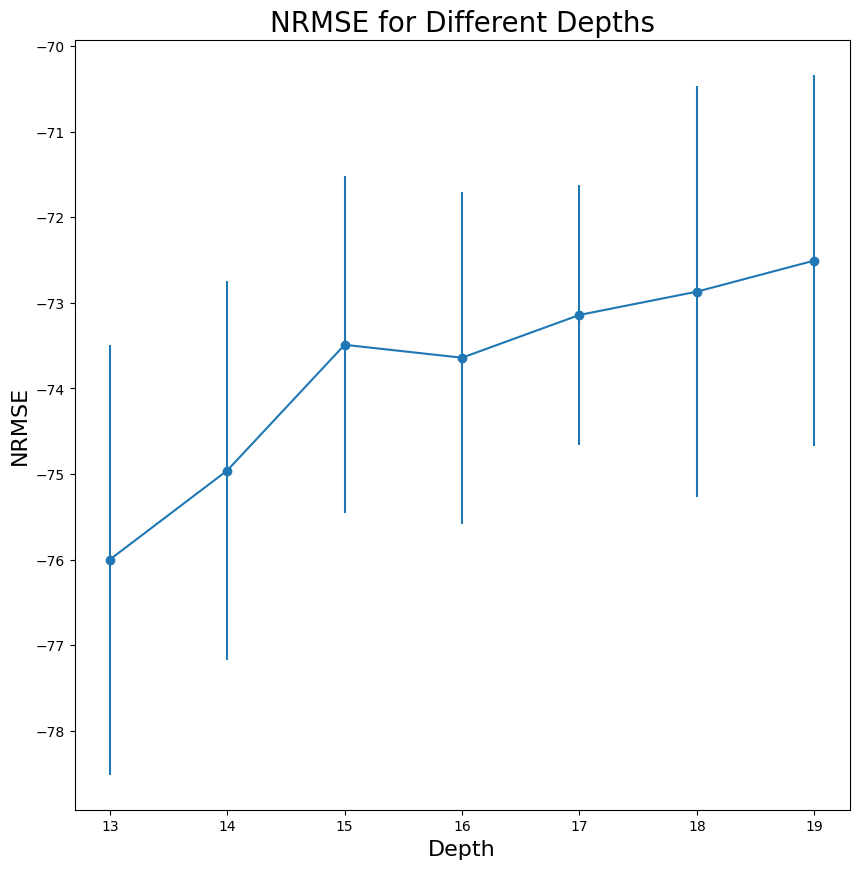

In [58]:
# Visualize the different accuracies for different depths of the decision tree
plt.figure(figsize=(10,10))
plt.errorbar(range(13,20,1), [m for m in means], yerr=stds, fmt='-o')
plt.title('NRMSE for Different Depths', fontsize=20)
plt.xlabel("Depth", fontsize=16)
plt.ylabel("NRMSE", fontsize=16)
plt.show()

In [60]:
# Save model for future use
best_est = crossval_rf.best_estimator_

joblib.dump(best_est,"Model.joblib")

['Model.joblib']

In [61]:
model = joblib.load("Model.joblib")

In [62]:
# NRMSE for test set is slightly worse than for train set
print("Negative RMSE: Train = {0:.4f}".format(np.mean(cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error'))))
print("Negative RMSE: Test = {0:.4f}".format(np.mean(cross_val_score(model, X_test, y_test, scoring='neg_root_mean_squared_error'))))

Negative RMSE: Train = -72.5061
Negative RMSE: Test = -81.9787


In [190]:
drop_data = data.drop(["cnt"],axis=1)

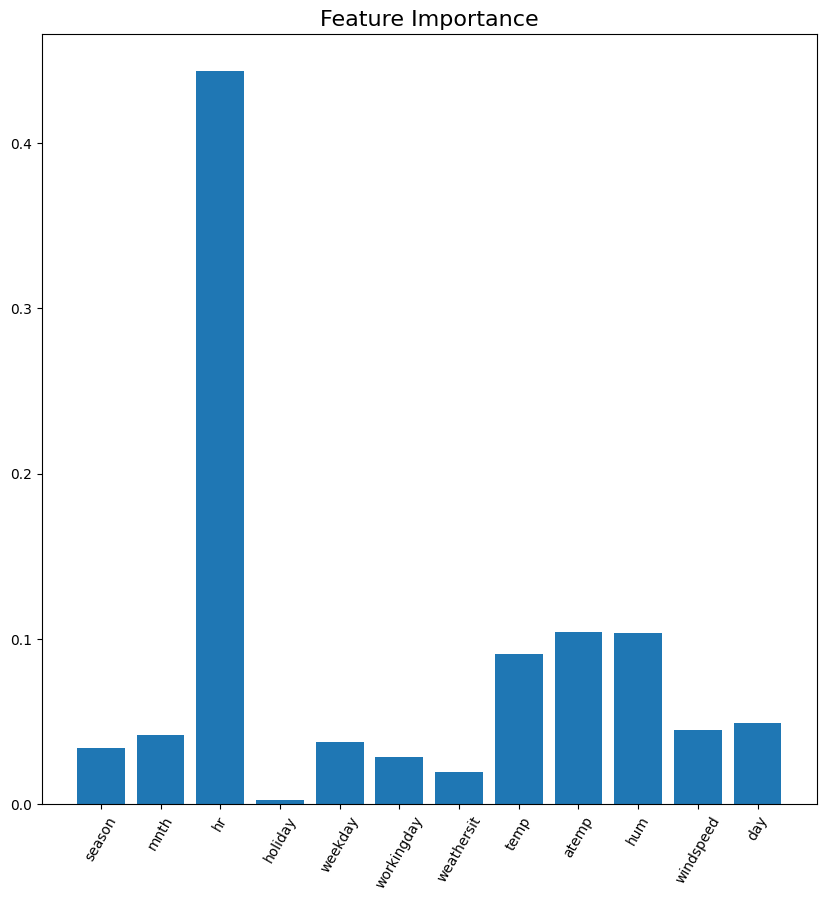

In [191]:
# Plot feature importances for the random forest
plt.figure(figsize=(10,10))
plt.bar(drop_data.columns, model.feature_importances_)
plt.xticks(rotation=60)
plt.title('Feature Importance', fontsize=16)
plt.show()

In [126]:
# Comment what the feature importance tells us about how to predict !

## PART III: Streamlit dashboard

In [ ]:
### This part goes in a separate script ###

In [ ]:
# Make temperature on x by demand on y
# Demand over the day by weekdays and by weekends